In [2]:
import pandas as pd

dataFile_emptyOutputs = pd.read_csv('dataFiles/test_data1_WithOutputs.csv')
print(dataFile_emptyOutputs.describe().T)

                          count         mean         std          min  \
Sr No                     132.0    66.500000   38.249183     1.000000   
RPM (1/s)                 132.0   580.492424  244.894914   100.000000   
L/S Ratio                 132.0     0.123105    0.076180     0.080000   
FlowRate (kg/hr)          132.0    10.903621    8.841178     1.000000   
Temperature               132.0    27.140152    4.593521    25.000000   
nCE                       132.0    20.496212    6.305970    15.000000   
Granulator diameter (mm)  132.0    20.909091    4.498438    16.000000   
L/D Ratio                 132.0    24.545455    5.843197    20.000000   
SA of KE                  132.0    55.227273   17.711251     0.000000   
n KE                      132.0     9.303030    5.447794     0.000000   
Intial D50                132.0    87.314167   62.917976    40.000000   
Binder Viscosity (mPa.s)  132.0     0.176295    0.221496     0.001000   
Flowability (HR)          132.0     1.314545    0.1

In [3]:
print(dataFile_emptyOutputs.isna().sum())
print(dataFile_emptyOutputs.info())

Sr No                         0
RPM (1/s)                     0
L/S Ratio                     0
FlowRate (kg/hr)              0
Temperature                   0
Screw Configuration           0
nCE                           0
Granulator diameter (mm)      0
L/D Ratio                     0
SA of KE                      0
n KE                          0
Liq add position              0
Intial D50                    0
Binder Viscosity (mPa.s)      0
Flowability (HR)              0
Bulk Density                  0
nKZ                           0
dKZ                           0
MRT                          72
Exp Fill level               90
Torque                       60
final d50                    78
Beta                        114
Regime                      114
Experiments                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                

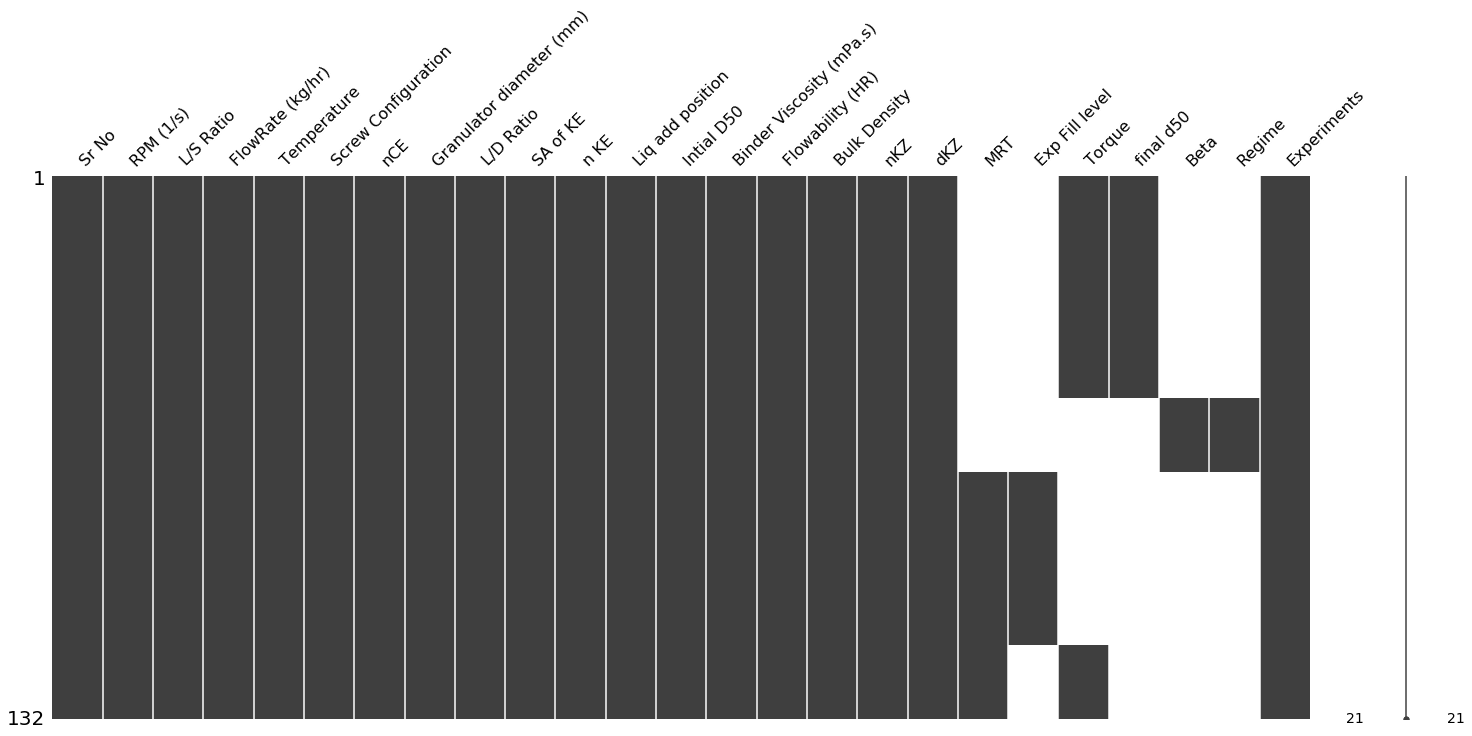

In [4]:
import missingno as mno
mno.matrix(dataFile_emptyOutputs)

In [5]:
missing_columns = ['Torque']
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [6]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

for feature in missing_columns:
    dataFile_emptyOutputs[feature+'_imp'] = dataFile_emptyOutputs[feature]
    dataFile_emptyOutputs = random_imputation(dataFile_emptyOutputs,feature)
print(dataFile_emptyOutputs)

     Sr No  RPM (1/s)  L/S Ratio  FlowRate (kg/hr)  Temperature  \
0        1        500   0.080000              10.0         25.0   
1        2        700   0.080000              10.0         25.0   
2        3        900   0.080000              10.0         25.0   
3        4        500   0.080000              17.5         25.0   
4        5        700   0.080000              17.5         25.0   
..     ...        ...        ...               ...          ...   
127    128        775   0.098901              17.5         32.5   
128    129        775   0.098901              17.5         32.5   
129    130        950   0.098901              10.0         40.0   
130    131        600   0.098901              10.0         40.0   
131    132        950   0.098901              10.0         40.0   

    Screw Configuration   nCE  Granulator diameter (mm)  L/D Ratio  SA of KE  \
0                C6K60C  19.0                        25         20        60   
1                C6K60C  19.0      

In [7]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])
dataFile_emptyOutputs = dataFile_emptyOutputs.drop(['Sr No','Screw Configuration','Experiments','Liq add position','Regime','Beta','MRT','Exp Fill level'],axis=1)

for feature in missing_columns:
        
    deter_data["Det" + feature] = dataFile_emptyOutputs[feature + "_imp"]
    parameters = list(set(dataFile_emptyOutputs.columns) - set(missing_columns) - {feature + '_imp'})
    print(parameters)
   

['L/S Ratio', 'nCE', 'FlowRate (kg/hr)', 'final d50', 'nKZ', 'SA of KE', 'Granulator diameter (mm)', 'dKZ', 'Binder Viscosity (mPa.s)', 'RPM (1/s)', 'L/D Ratio', 'n KE', 'Intial D50', 'Flowability (HR)', 'Bulk Density', 'Temperature']


In [8]:
for feature in missing_columns:
 #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = dataFile_emptyOutputs[parameters], y = dataFile_emptyOutputs[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[dataFile_emptyOutputs[feature].isnull(), "Det" + feature] = model.predict(dataFile_emptyOutputs[parameters])[dataFile_emptyOutputs[feature].isnull()]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').